#### Malwina Wojewoda
# Density estimation

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import KBinsDiscretizer
import warnings
np.random.seed(17)
pd.set_option('future.no_silent_downcasting', True)
warnings.filterwarnings('ignore')

## Task 1
##### Generate sample of size 200 from the mixture of two distributions: 0.9 ∗ N(5, 1) + 0.1 ∗ N(10, 1).

In [25]:
def generate_sample(n):
    sample_data = np.concatenate(
        [np.random.normal(5, 1, int(n * 0.9)), 
        np.random.normal(10, 1, int(n * 0.1))]
    )
    np.random.shuffle(sample_data)
    return sample_data

In [26]:
n = 200
sample_data = generate_sample(n)

##### Use kernel density estimator to approximate the theoretical density f corresponding to the above distribution. Draw density function corresponding to theoretical distribution and estimated function fˆn.

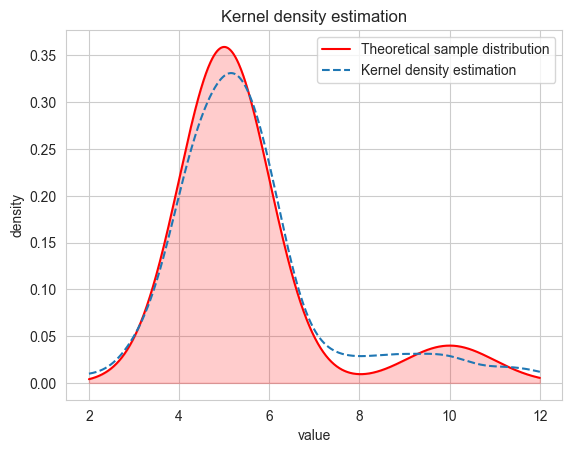

In [27]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(sample_data.reshape(-1, 1))

X_plot = np.linspace(2, 12, 1000)[:, np.newaxis]
log_density = kde.score_samples(X_plot)
estimated_density = np.exp(log_density)
true_density = 0.9 * norm(5, 1).pdf(X_plot) + 0.1 * norm(10, 1).pdf(X_plot)

plt.plot(X_plot[:, 0], true_density, color='red', label='Theoretical sample distribution')
plt.fill_between(X_plot[:, 0], 0, true_density.ravel(), alpha=0.2, color='red')
plt.plot(X_plot, estimated_density, linestyle='--', label='Kernel density estimation')
plt.title('Kernel density estimation')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()

##### Compute mean squared error (MSE) of the estimated density function fˆn.

In [28]:
log_density_sample = kde.score_samples(sample_data.reshape(-1, 1))
estimated_density_sample = np.exp(log_density_sample)
 
print("MSE of the estimated density function: ", round(mean_squared_error(sample_data, estimated_density_sample), 3))

MSE of the estimated density function:  31.853


##### Analyse how the error depends on sample size n. Generate a plot showing how the mean squared error changes with n.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


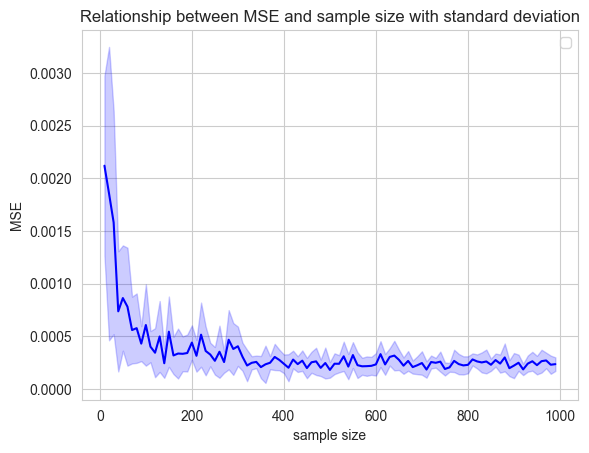

In [29]:
n_sizes = range(10, 1000, 10)
mse_values_all = []

for _ in range(10):
    mse_values = []
    for n in n_sizes:
        sample_data = generate_sample(n)
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(sample_data.reshape(-1, 1))
        log_density = kde.score_samples(X_plot.reshape(-1, 1))
        estimated_density = np.exp(log_density)
        true_density = 0.9 * norm(5, 1).pdf(X_plot) + 0.1 * norm(10, 1).pdf(X_plot)

        mse_values.append(mean_squared_error(true_density, estimated_density))
    mse_values_all.append(mse_values)

std_devs = np.std(mse_values_all, axis=0)
mean_mse_values = np.mean(mse_values_all, axis=0)

plt.plot(n_sizes, mean_mse_values, color='blue')
plt.fill_between(n_sizes, mean_mse_values - std_devs, mean_mse_values + std_devs, color='blue', alpha=0.2)
plt.title('Relationship between MSE and sample size with standard deviation')
plt.xlabel('sample size')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

##### Analyse the influence of different kernel functions as well as smoothing parameters. Generate curves for different kernels and different values of smoothing parameters. Try at least 3 kernels and 3 values of smoothing parameters. In addition, use one of the smooting parameter estimation methods.

Infulence of different kernels

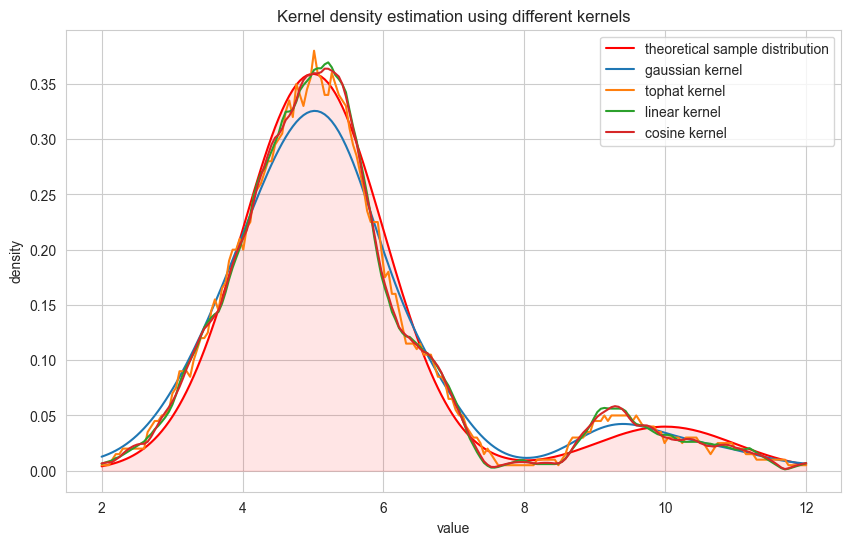

In [30]:
sample_data = generate_sample(200)
X_plot = np.linspace(2, 12, 200)[:, np.newaxis]
true_density = 0.9 * norm(5, 1).pdf(X_plot[:, 0]) + 0.1 * norm(10, 1).pdf(X_plot[:, 0])

plt.figure(figsize=(10, 6))
plt.plot(X_plot[:, 0], true_density, color='red', label='theoretical sample distribution')
plt.fill_between(X_plot[:, 0], 0, true_density.ravel(), alpha=0.1, color='red')
    
for kernel in ['gaussian', 'tophat', 'linear', 'cosine']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(sample_data.reshape(-1, 1))
    log_density = kde.score_samples(X_plot)
    estimated_density = np.exp(log_density)
    plt.plot(X_plot[:, 0], estimated_density, linestyle='-', label=f'{kernel} kernel')

plt.title('Kernel density estimation using different kernels')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()

Influence of different bandwidths

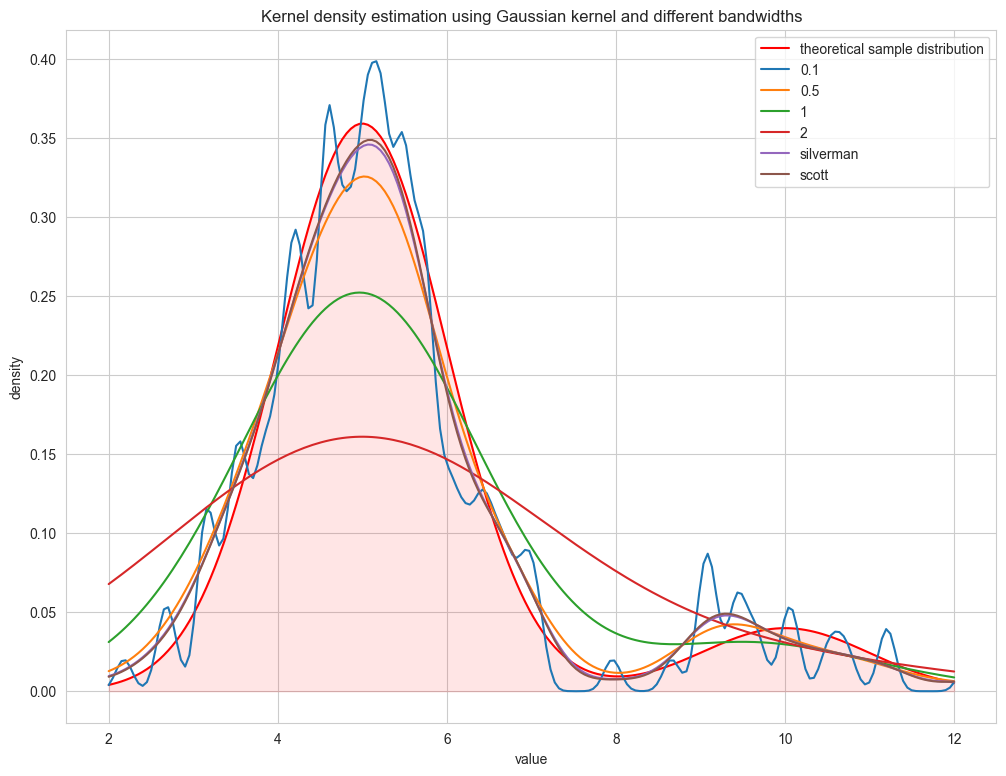

In [31]:
plt.figure(figsize=(12, 9))
plt.plot(X_plot[:, 0], true_density, color='red', label='theoretical sample distribution')
plt.fill_between(X_plot[:, 0], 0, true_density.ravel(), alpha=0.1, color='red')

for bandwidth in [0.1, 0.5, 1, 2, 'silverman', 'scott']:
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(sample_data.reshape(-1, 1))
    log_density = kde.score_samples(X_plot)
    estimated_density = np.exp(log_density)
    plt.plot(X_plot[:, 0], estimated_density, linestyle='-', label=bandwidth)

plt.title(f'Kernel density estimation using Gaussian kernel and different bandwidths')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()

Infuence of different kernels and bandwidths

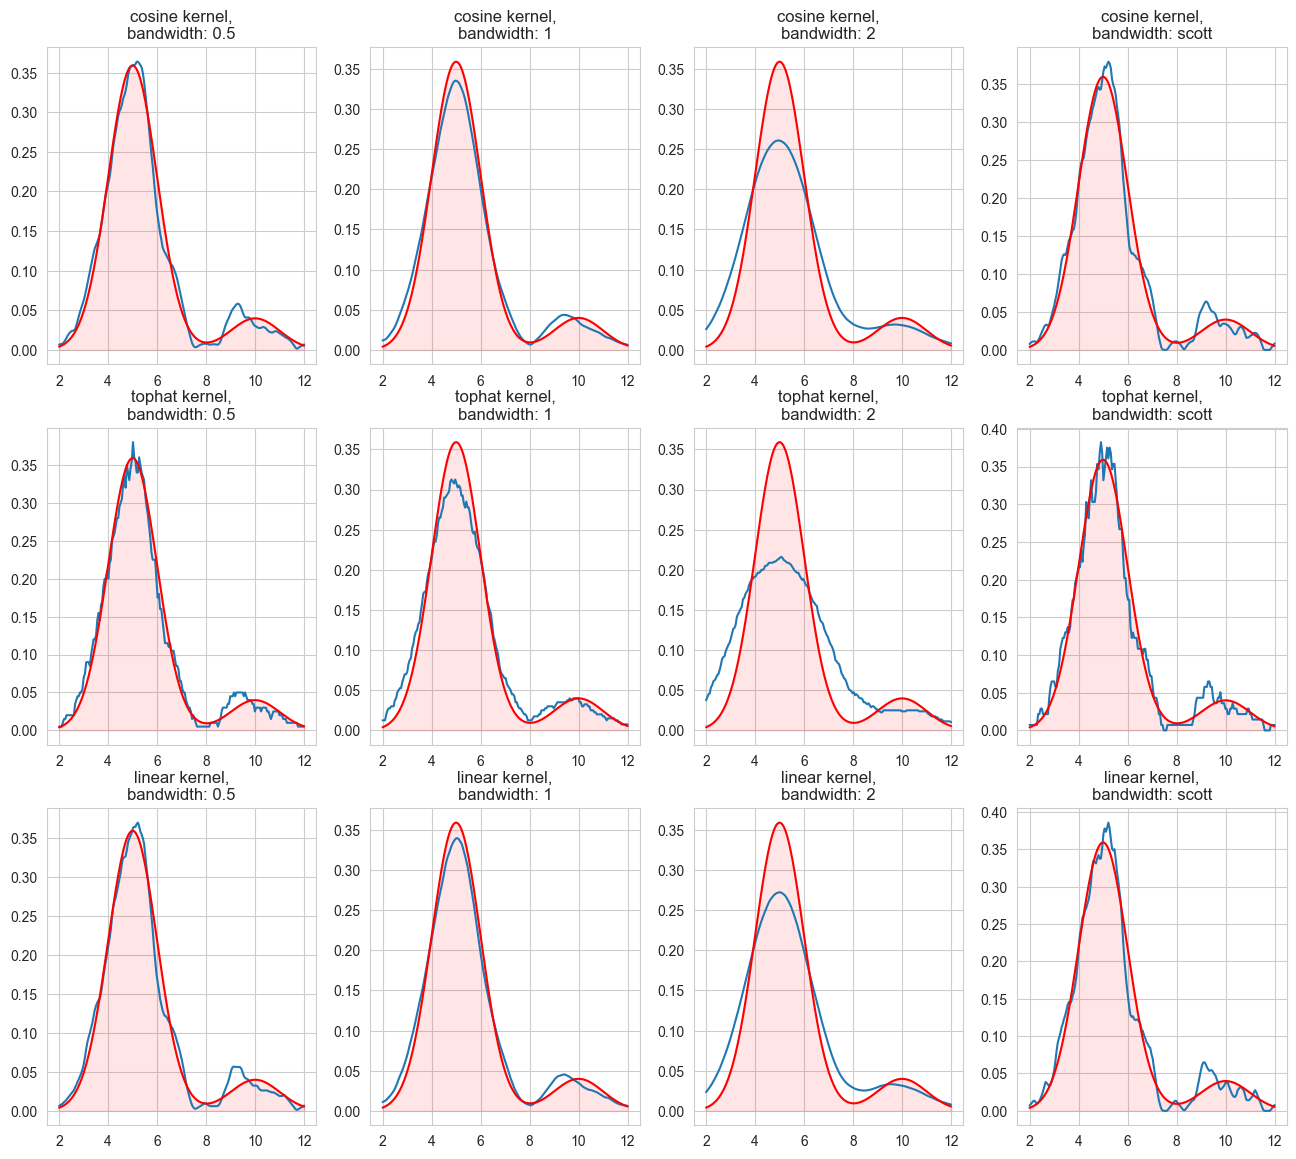

In [32]:
bandwidths = [0.5, 1, 2, 'scott']
kernels = ['cosine', 'tophat', 'linear']
fig, ax = plt.subplots(3, 4, figsize=(16, 14))
for i in range(len(kernels)):
    for j in range(len(bandwidths)):
        kernel = kernels[i]
        bandwidth = bandwidths[j]
        
        kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(sample_data.reshape(-1, 1))
        log_density = kde.score_samples(X_plot)
        estimated_density = np.exp(log_density)
        
        ax[i, j].plot(X_plot[:, 0], estimated_density, linestyle='-', label=bandwidth)
        ax[i, j].plot(X_plot[:, 0], true_density, color='red', label='theoretical sample distribution')
        ax[i, j].fill_between(X_plot[:, 0], 0, true_density.ravel(), alpha=0.1, color='red')
        ax[i, j].set_title(f'{kernel} kernel,\nbandwidth: {bandwidth}')
plt.show()

## Task 2
#### Generate sample X1, . . . , Xn of size n = 200 from Gauusian mixture model described above. Compare two methods (compute MSE for both of them)
 (a) Method 1: Kernel density estimator using sample X1, . . . , Xn

(b) Method 2: Using sample X1, . . . , Xn, generate artificial sample X′1, . . . , X′k (you can choose k much larger than n) corresponding to the kernel density as follows:
 - Generate i from uniform distribution on {1, . . . , n}
 - Generate ϵ from N(0, 1)
 - Set X′i = Xi + ϵ · h

Compute kernel density estimator using modified sample X′1, . . . , X′

In [33]:
sample_data = generate_sample(200)

In [34]:
# Method 1
X_plot_m1 = np.linspace(2, 12, 200)[:, np.newaxis]
true_density = 0.9 * norm(5, 1).pdf(X_plot_m1) + 0.1 * norm(10, 1).pdf(X_plot_m1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(sample_data.reshape(-1, 1))
log_density = kde.score_samples(X_plot_m1)
estimated_density = np.exp(log_density)

# Method 2
k = 2000
artificial_sample = np.zeros(k)
for i in range(k):
    index = np.random.randint(0, 200)
    epsilon = np.random.normal(0, 1)
    artificial_sample[i] = sample_data[index] + epsilon * 0.5 

X_plot_m2 = np.linspace(2, 12, 2000)[:, np.newaxis]   
true_density_artificial = 0.9 * norm(5, 1).pdf(X_plot_m2) + 0.1 * norm(10, 1).pdf(X_plot_m2)

kde_artificial = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(artificial_sample.reshape(-1, 1))
log_density_artificial = kde_artificial.score_samples(X_plot_m2)
estimated_density_artificial = np.exp(log_density_artificial)

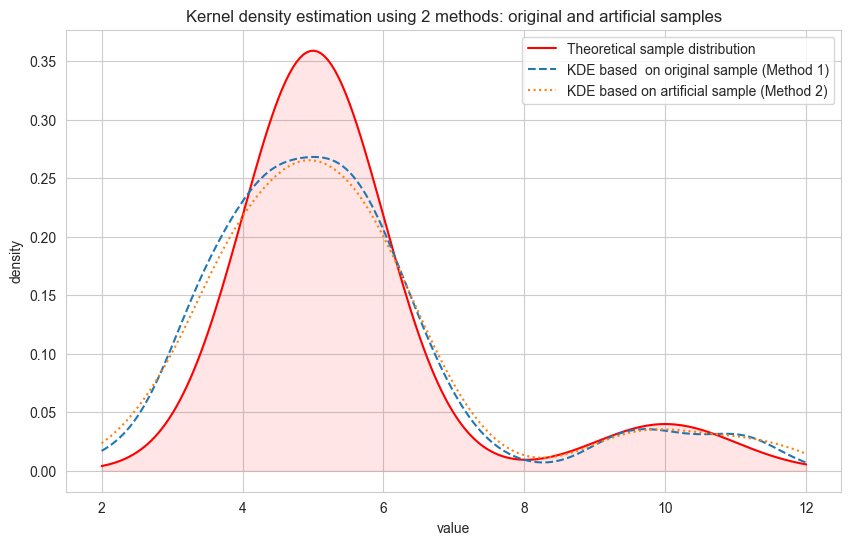

MSE for method 1: 0.0012056494801907407
MSE for method 2: 0.0012954584994471236


In [35]:
plt.figure(figsize=(10, 6))
plt.plot(X_plot_m1, true_density, color='red', label='Theoretical sample distribution')
plt.fill_between(X_plot_m1[:, 0], 0, true_density.ravel(), alpha=0.1, color='red')
plt.plot(X_plot_m1, estimated_density, linestyle='--', label=f'KDE based  on original sample (Method 1)')
plt.plot(X_plot_m2, estimated_density_artificial, linestyle=':', label=f'KDE based on artificial sample (Method 2)')
plt.title('Kernel density estimation using 2 methods: original and artificial samples')
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()

print(f"MSE for method 1: {mean_squared_error(true_density, estimated_density)}")
print(f"MSE for method 2: {mean_squared_error(true_density_artificial, estimated_density_artificial)}")

## Task 3
##### Select any dataset corresponding to binary classification problem wih quantitative variables. Compare the accuracy of:
   - Naive Bayes method (with kernel density estimator)
   - Naive Bayes Method (with Gaussian approximation of the density)
   - Naive Bayes method (with discretization of quantitative features)
   - LDA

In [36]:
# Breast Cancer Wisconsin (Diagnostic) Data Set
dataset = fetch_ucirepo(id=17) 
X = dataset.data.features.values
y = dataset.data.targets 
y = y.replace({'M': 1, 'B': 0}).astype(int)
y = y.values.ravel()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)

###### Naive Bayes method (with kernel density estimator)

In [38]:
class NaiveBayesKDE:
    def __init__(self, kernel='gaussian', bandwidth='silverman'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.kde_0 = []
        self.kde_1 = []
        self.prior_proba = None

    def fit(self, X, y):
        X_0 = X[y == 0]
        X_1 = X[y == 1]
        
        self.prior_proba = np.mean(y)
        self.kde_0 = [
            KernelDensity(kernel=self.kernel, bandwidth=self.bandwidth).fit(X_0[:, i].reshape(-1, 1)) 
            for i in range(X.shape[1])
        ]
        self.kde_1 = [
            KernelDensity(kernel=self.kernel, bandwidth=self.bandwidth).fit(X_1[:, i].reshape(-1, 1)) 
            for i in range(X.shape[1])
        ]

    def predict_proba(self, X):
        density_0 = [np.exp(kde.score_samples(X[:, i].reshape(-1, 1))) for i, kde in enumerate(self.kde_0)]
        density_1 = [np.exp(kde.score_samples(X[:, i].reshape(-1, 1))) for i, kde in enumerate(self.kde_1)]

        return np.prod(density_1, axis=0) * self.prior_proba / (np.prod(density_1, axis=0) * self.prior_proba + np.prod(density_0, axis=0) * (1 - self.prior_proba))

    def predict(self, X, threshold=0.5):
        posterior_proba = self.predict_proba(X)
        return [int(x >= threshold) for x in posterior_proba]

In [39]:
kdeNB = NaiveBayesKDE(bandwidth=2.5)
kdeNB.fit(X_train, y_train)
y_pred_kdeNB = kdeNB.predict(X_test)
acc_kdeNB = accuracy_score(y_test, y_pred_kdeNB)

###### Naive Bayes Method (with Gaussian approximation of the density)

In [40]:
gNB = GaussianNB()
y_pred_gNB = gNB.fit(X_train, y_train).predict(X_test)
acc_gNB = accuracy_score(y_test, y_pred_gNB)

###### Naive Bayes method (with discretization of quantitative features)

In [41]:
kbd = KBinsDiscretizer(encode='ordinal').fit(X_train)
X_train_discr = kbd.transform(X_train)
X_test_discr = kbd.transform(X_test)

In [42]:
cNB = CategoricalNB().fit(X_train_discr, y_train)
y_pred_cNB = cNB.predict(X_test_discr)
acc_cNB = accuracy_score(y_test, y_pred_cNB)

###### LDA - Linear Discriminant Analysis

In [43]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_test, y_pred_lda)

##### Comparison of the accuracy of the models

In [44]:
data = {
    'model': ['Naive Bayes with KDE', 'Naive Bayes with Gaussian approximation', 'Naive Bayes with discretization', 'LDA'],
    'accuracy': [acc_kdeNB, acc_gNB, acc_cNB, acc_lda]
}

pd.DataFrame(data)

,model,accuracy
0,Naive Bayes with KDE,0.903509
1,Naive Bayes with Gaussian approximation,0.942982
2,Naive Bayes with discretization,0.934211
3,LDA,0.964912


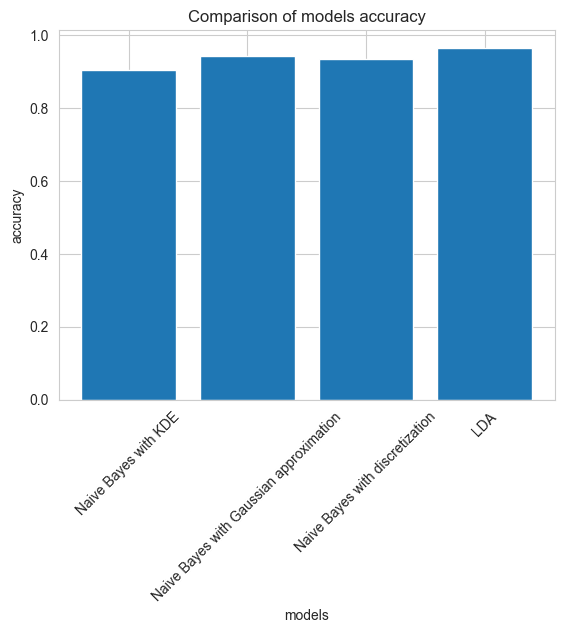

In [45]:
models = ['Naive Bayes with KDE', 'Naive Bayes with Gaussian approximation', 'Naive Bayes with discretization', 'LDA']
accuracy = [acc_kdeNB, acc_gNB, acc_cNB, acc_lda]

plt.bar(models, accuracy)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('Comparison of models accuracy')
plt.xticks(rotation=45)
plt.show()

Accuracy values obtained using different methods are similar, ranging from approximately 0.90 to 0.96. The best results were obtained using LDA. The worst results by Naive Bayes with Kernel Density Estimator. It is worth noting that smoothing parameter in the latter method was selected experimentally.